# **Tutorial:** Redes Neuronales Artificiales (Perceptrón Multicapa) para regresión 

> Por Iván Ávalos y José Moreno <br>

## Contenidos

#### **Sección I**
1. **Bases:** Brief histórico
2. **Bases:** Un perceptrón
3. **Código:** Un perceptrón
4. **Bases:** Activación y bias

## **Sección I**

### **Historia de las redes neuronales**

La historia de las redes neuronales se remontan a un tipo de neurona artificial, llamada **perceptrón**. Estos fueron desarrollados entre 1950 y 1960 por el científico **Frank Rosenblatt**.

### **Entonces, ¿qué es un perceptrón?**

Un perceptrón es una abstracción de una neurona real.

Éste toma varias **entradas** $x_1, x_2,..., x_n $ y produce una **salida**. Para la salida, Rosenblatt propuso que las entradas tuviesen **pesos** asociados $w_1, w_2, ..., w_n$, siendo estos números reales que expresan la importancia respectiva de cada entrada para la salida. La salida de la neurona, $0$ o $1$, está determinada con base en la suma ponderada, 

$$\displaystyle\sum_{j}w_jx_j,$$

<!-- $\textbf{w}_{Layer}\cdot\textbf{x} = 
\begin{bmatrix}
w_{1, 1} & w_{1, 2} & \cdots & w_{1, n}\\
w_{2, 1} & w_{2, 2} & \cdots & w_{2, n}\\
\vdots & \vdots & \ddots & \vdots\\
w_{m, 1} & w_{m, 2} & \cdots & w_{m, n}\\
\end{bmatrix} \cdot
\begin{bmatrix}
x_1\\
x_2\\
\vdots\\
x_n
\end{bmatrix}$ -->

(para $j \in \{1, 2, ..., n\}$ ) sea menor o mayor que un **valor límite** que por ahora llamaremos umbral.

Resumiendo, un perceptron es un sistema que toma decisiones con base en la evidencia presentada.

#### **Hagamos un ejemplo**

In [ ]:
import numpy as np
from numpy.random import uniform as u
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 24
plt.style.use('seaborn-poster')

# Primero creamos nuestra clase perceptron
class Perceptron():
    def __init__(self, inputs, weights):
        self.inputs = np.array(inputs)
        self.weights = np.array(weights)
  
    def decide(self, treshold):
        if self.weights @ self.inputs <= treshold:
            print("Híjoles, no se va a poder...")
        else:
            print("Puedes ir.")

In [ ]:
# Ahora necesitamos darle sus entradas y pesos asociados
inputs, weights = [], []

preguntas = [
    "· ¿Va a llover? ",
    "· ¿Van a regalar cheetos? ",
    "· ¿Tengo con quien ir? "
]

for pregunta in preguntas:
    i = int(input(pregunta))
    w = int(input("· Y su peso asociado es... "))
    inputs.append(i)
    weights.append(w)
    print()

treshold = int(input("· Y nuestro umbral/límite será: "))

· ¿Va a llover? 0
· Y su peso asociado es... 7

· ¿Van a regalar cheetos? 1
· Y su peso asociado es... 8

· ¿Tengo con quien ir? 1
· Y su peso asociado es... -3

· Y nuestro umbral/límite será: 6


In [ ]:
p = Perceptron(inputs, weights)
p.decide(treshold)

Híjoles, no se va a poder...


### **Bias y funciones de activación**

_Antes de seguir, introduciremos otro concepto, que es el **bias**._

La operación matemática que realiza la neurona se puede escribir como:

$$ f(\textbf{x}) = 
  \begin{cases}
    0 & \text{si $\displaystyle\sum_{j}w_jx_j <$ valor limite o treshold} \\
    1 & \text{si $\displaystyle\sum_{j}w_jx_j \geq$ valor limite o treshold} \\
  \end{cases}$$

donde $\textbf{x} = (x_1, x_2, ..., x_n)$ y $j \in \{1, 2, ..., n\}$.

De lo anterior, podemos despejar el valor límite (el umbral) y escribirlo como $b$, obteniendo:

$$ f(\textbf{x}) = 
  \begin{cases}
    0 & \text{si $\displaystyle\sum_{j}w_jx_j + b < 0$} \\
    1 & \text{si $\displaystyle\sum_{j}w_jx_j + b > 0$} \\
  \end{cases},$$

donde $\textbf{x} = (x_1, x_2, ..., x_n)$ y $j \in \{1, 2, ..., n\}$.

Esto que escribimos como $b$, también se le conoce como **bias**, y describe *qué tan susceptible la red es a __dispararse__*.

Curiosamente, esta descripción matemática encaja con la función de salto, que es una función de activación. Esto es, una función que permite el paso de información de acuerdo a la entrada y los pesos, permitiendo el disparo del lo procesado hacia la salida. La función de salto se ve como sigue:

<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/4/4a/Funci%C3%B3n_Cu_H.svg" width="40%" alt="Función escalón de Heaviside">
</center>

Sin embargo, podemos hacer a una neurona aún más susceptible con respecto a los datos de la misma (entradas, pesos, bias) añadiendo una función sigmoide. La función sigmoide se ve como a continuación: 

<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/66/Funci%C3%B3n_sigmoide_01.svg" width="40%" alt="Función sigmoide">
</center>

Esta función es suave, y por lo tanto tiene una diferente "sensibililad" a los cambios abruptos de valores. También, sus entradas en lugar de solo ser $1$'s o $0$'s, pueden ser valores en todos los números reales. La función sigmoide es descrita por la siguiente expresión matemática:

$$f(z) = \dfrac{1}{1+e^{-z}}$$

O escrito en términos de pesos y biases:

$$f(z) = \dfrac{1}{1+\exp{\left\{-\left(\displaystyle\sum_{j}w_jx_j +b\right)\right\}}}$$

#### **Volviendo al ejemplo**

In [ ]:
# Modificamos para añadir la función de activación
class SigmoidNeuron():
    def __init__(self, inputs, weights):
        self.inputs = np.array(inputs)
        self.weights = np.array(weights)
  
    def decide(self, bias):
        z = (self.weights @ self.inputs) + bias
        return 1. / (1. + np.exp(-z))

In [ ]:
bias = int(input("· El nuevo bias será: "))
s = SigmoidNeuron(inputs, weights)
s.decide(bias)

· El nuevo bias será: 6


0.999983298578152

#### **Ejemplo - Porblema de regresión con una red neuronal**

* Se trabajará con el conjunto de base de datos **Auto MPG** para predecir la eficiencia de vehiculos entre los años 1970 y 1980.

* Para la construcción de la red neuronal se utilizará la API **tf.Keras**

In [ ]:
# Importamos los modulos a utilizar
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Obtenemos el conjunto de datos Auto MPG

# Obtenemos la direccion del repositorio 
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
# Creamos los encabezados
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
# Leemos el conjunto de datos y lo guardamos como dataFrame de pandas
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)
# Guardamos el dataFrame
dataset = raw_dataset.copy()

# Limpiamos los datos 
dataset.isna().sum()
# Eliminamos las filas que les hace falta valores
dataset = dataset.dropna()

dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
# El atributo Origin es categórico, lo volvemos un vector one-hot
origin = dataset.pop('Origin')

dataset['USA'] = (origin == 1)*1
dataset['Europe'] = (origin == 2)*1
dataset['Japan'] = (origin == 3)*1
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,0,0


In [ ]:
# Particionamos el conjunto de datos en datos de entrenamiento y prueba
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print(train_dataset.shape)
print(test_dataset.shape)

(314, 10)
(78, 10)


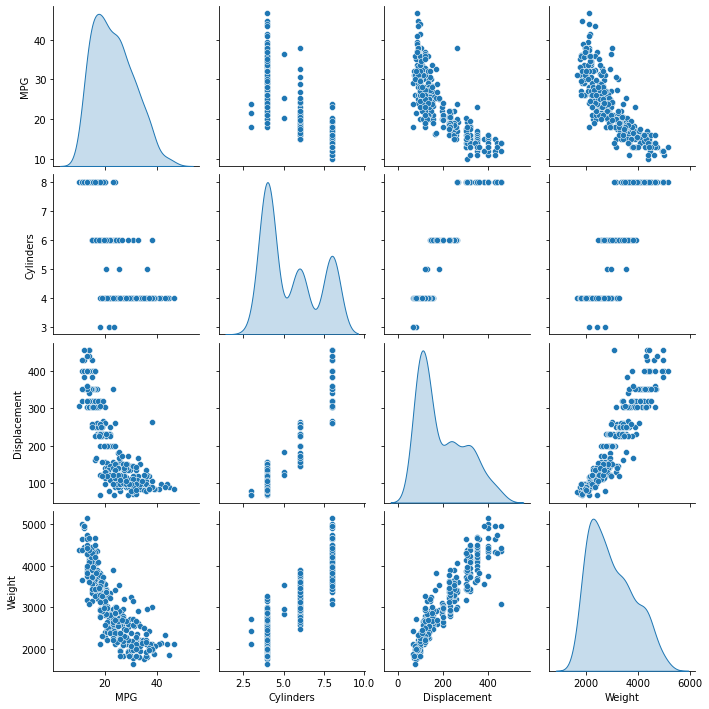

In [ ]:
# Inspeccionamos los datos de entrenamiento
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")
plt.show()

In [ ]:
# Revisamos estadísticas
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [ ]:
train_dataset.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
USA               int64
Europe            int64
Japan             int64
dtype: object

In [ ]:
# Creamos las etiquetas, en este caso son los valores de MPG
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

# Normalizamos los datos - Ayuda a convergencia del algoritmo
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

normed_train_data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397,0.774676,-0.465148,-0.495225
282,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910,0.774676,-0.465148,-0.495225
69,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519,0.774676,-0.465148,-0.495225
378,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094,0.774676,-0.465148,-0.495225
331,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971,-1.286751,-0.465148,2.012852
...,...,...,...,...,...,...,...,...,...
281,0.307270,0.044872,-0.521559,-0.000298,0.946772,0.843910,0.774676,-0.465148,-0.495225
229,1.483887,1.961837,1.972127,1.457223,-1.598734,0.299787,0.774676,-0.465148,-0.495225
150,-0.869348,-0.836932,-0.311564,-0.710099,-0.021237,-0.516397,-1.286751,-0.465148,2.012852
145,-0.869348,-1.076553,-1.151543,-1.169870,1.233589,-0.516397,-1.286751,-0.465148,2.012852


In [ ]:
# Construccion del modelo
"""
    Número de Neuronas de entrada : 9
    Número de Neuronas de la primera capa: 64 - Función de activación Relu
    Número de Neuronas de la tercera capa: 64 - Función de activación Relu
    Número de Neuronas de la capa de salida: 1

"""

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(normed_train_data.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  # Definimos el optimizador
  optimizer = tf.keras.optimizers.SGD(0.001)
  # Definimos la funcion de perdida como el error cuadrático medio
  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse'])
  return model

# Instanciamos el modelo
model = build_model()


In [ ]:
# Observamos al modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

Epochs = 1000

history = model.fit(
    normed_train_data, train_labels,
    epochs=Epochs, validation_split = 0.2, verbose=0,
    callbacks=[PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

,loss,mse,val_loss,val_mse,epoch
995,4.695095,4.695095,8.071383,8.071383,995
996,4.478474,4.478474,7.647391,7.647391,996
997,4.346356,4.346356,7.953676,7.953676,997
998,4.544896,4.544896,7.924755,7.924755,998
999,4.433896,4.433896,7.726995,7.726995,999


In [ ]:
plt.rcParams['font.size'] = 24
plt.style.use('seaborn-poster')

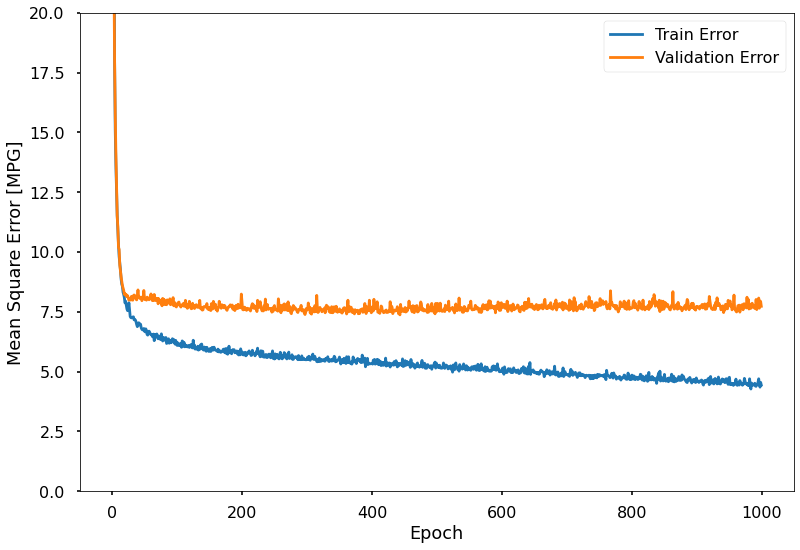

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [MPG]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Validation Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(normed_test_data, test_labels, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
1/1 [==============================] - 0s 1ms/step - loss: 6.2781 - mse: 6.2781
test loss, test acc: [6.278149127960205, 6.278149127960205]


In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = model.evaluate(normed_train_data, train_labels, batch_size=128)
print("train loss, train acc:", results)

Evaluate on train data
3/3 [==============================] - 0s 2ms/step - loss: 5.0977 - mse: 5.0977
train loss, train acc: [5.097741603851318, 5.097741603851318]
